# Analysis of Pollution Exposure in California
### Storytelling through visualization and A/B Testing by Sunya Abbasi

### Intro

<b>The Data:</b> I will be looking at data I downloaded from the California Office of Environmental
Health Hazard Assessment website. The granuarity of the data is each census tract from the 2010 Census. The dataframe includes features that measure pollution and its impacts on our environment and community. Additionally, the dataframe has features to represent various socioeconomic characteristcs of each census tract based on data from the 2019 American Community Survey from the Census Bureau. 

<b>My Project:</b> For my project, I want to look at how exposure to pollution burden on different communities and its harmful effects in California. Secondly, I will perform A/B testing to see if there is a difference in the distribution of emergency asthma visits per 10,000 people for people living in areas with low versus high pollution levels.

In [35]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#reading in tables
df = pd.read_csv("calenviro.csv")
demo = pd.read_csv("demographicscalenviro.csv")

In [114]:
df.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

### Defining Key Features

<b>"Asthma"</b>: The rate of emergency department visits for Asthma per 10,000.

<b>"Pollution Burden Score"</b>: Derived by OEHHA through averaging percentiles of seven Exposures indicators and five Environmental Effects indicators to create a score ranging from 0.1 to 10.

## Data Cleaning & Prep

In [38]:
f = demo.iloc[0]

In [39]:
demo.columns = f
demo_length = len(demo)
demo = demo.iloc[1:demo_length + 1]
demo = demo.astype({'Census Tract' : "int64", 'Hispanic (%)' : "float", 'White (%)': "float", 
                    'African American (%)': "float",'Native American (%)': "float", 
                    'Asian American (%)': "float", 'Other/Multiple (%)': "float", "Total Population": "int64"})

In [40]:
df_imp = df[['Census Tract', 'Total Population', 'Pollution Burden Score', 'Asthma']]
df_imp = df_imp[df_imp["Total Population"] > 0]
df_imp = df_imp.astype({"Pollution Burden Score" : "float", "Asthma": "float"})
demo_imp = demo[['Census Tract', 'Hispanic (%)', 'White (%)','African American (%)', 'Native American (%)', 
               'Asian American (%)','Other/Multiple (%)']]
full_df = df_imp.merge(demo_imp, 'left', 'Census Tract')



In [41]:
names = ['Hispanic (%)', 'White (%)', 'African American (%)','Native American (%)', 'Asian American (%)', 
         'Other/Multiple (%)']
for i in names:
    full_df[i] = full_df[i] * 0.01
full_df.head()

,Census Tract,Total Population,Pollution Burden Score,Asthma,Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other/Multiple (%)
0,6019001100,2780,9.64,129.54,0.7403,0.0252,0.1978,0.0007,0.0097,0.0263
1,6077000700,4680,8.97,105.88,0.6692,0.0814,0.0835,0.0000,0.1494,0.0165
2,6037204920,2751,9.48,76.10,0.9727,0.0171,0.0084,0.0000,0.0000,0.0018
3,6019000700,3664,8.28,139.45,0.6681,0.0259,0.1930,0.0027,0.0849,0.0254
4,6019000200,2689,8.16,139.08,0.7367,0.0614,0.1186,0.0011,0.0807,0.0015


In [42]:
categories = ['Hispanic ', 'White ', 'African American ','Native American ', 'Asian American ', 
         'Other/Multiple ']
for i in categories:
    full_df[i + "Population"] = full_df["Total Population"] * full_df[i + "(%)"]

In [43]:
full_df.head()

,Census Tract,Total Population,Pollution Burden Score,Asthma,Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other/Multiple (%),Hispanic Population,White Population,African American Population,Native American Population,Asian American Population,Other/Multiple Population
0,6019001100,2780,9.64,129.54,0.7403,0.0252,0.1978,0.0007,0.0097,0.0263,2058.0340,70.0560,549.8840,1.9460,26.9660,73.1140
1,6077000700,4680,8.97,105.88,0.6692,0.0814,0.0835,0.0000,0.1494,0.0165,3131.8560,380.9520,390.7800,0.0000,699.1920,77.2200
2,6037204920,2751,9.48,76.10,0.9727,0.0171,0.0084,0.0000,0.0000,0.0018,2675.8977,47.0421,23.1084,0.0000,0.0000,4.9518
3,6019000700,3664,8.28,139.45,0.6681,0.0259,0.1930,0.0027,0.0849,0.0254,2447.9184,94.8976,707.1520,9.8928,311.0736,93.0656
4,6019000200,2689,8.16,139.08,0.7367,0.0614,0.1186,0.0011,0.0807,0.0015,1980.9863,165.1046,318.9154,2.9579,217.0023,4.0335


In the following visualizations I will be comparing the racial makeup of a census tract with its pollution burden score. As defined on the California Office of Environmental Health Hazard Assessment (OEHHA) website, pollution burden score is "the average of Environmental Effects and Exposures components, where the Environmental Effects component is weighted one-half because we consider Environmental Effects to make a smaller contribution to Pollution Burden than Exposures do" (OEHHA).

In [44]:
## This function will be used to give us the average pollution burden score 
## that a person from x demographic lives under
def weighted_avg(pbs_array, population_array):
    summed_pop = sum(population_array)
    percentage_of_total_pop = population_array / summed_pop
    return sum(pbs_array * percentage_of_total_pop)
    

In [45]:
race_vs_avg_pbs = pd.DataFrame(data = {"Race": ['Hispanic', 'White', 'African American','Native American', 'Asian American', 
                                                'Other/Multiple'] })
avg_scores = []
for i in categories:
    avg_scores.append(weighted_avg(full_df["Pollution Burden Score"], full_df[i + "Population"]))
    

race_vs_avg_pbs['Average Pollution Burden Score'] = avg_scores
race_vs_avg_pbs = race_vs_avg_pbs.sort_values('Average Pollution Burden Score')

In [46]:
race_vs_avg_pbs.head()

,Race,Average Pollution Burden Score
1,White,4.790338
3,Native American,4.837025
5,Other/Multiple,4.928697
4,Asian American,5.130662
2,African American,5.430234


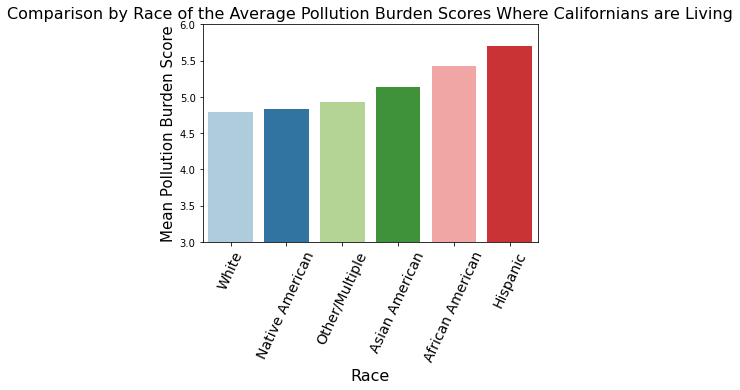

In [146]:
sns.set_palette("Paired")
sns.barplot(data = race_vs_avg_pbs, x = "Race", y = "Average Pollution Burden Score")
plt.title("Comparison by Race of the Average Pollution Burden Scores Where Californians are Living", fontdict = {'fontsize' : 16})
plt.ylim(3, 6)
plt.xlabel("Race", fontdict = {'fontsize' : 16})
plt.ylabel("Mean Pollution Burden Score", fontsize = 15)
plt.xticks(np.arange(6), race_vs_avg_pbs["Race"],fontsize=14, rotation= 65);

### What can we Gather from this Visualization?
Within California, White People seem to live in areas where the pollution score is lowest while Hispanic People live in areas where pollution scores are highest.



In [119]:
#creating DataFrame for Race-Asthma comparison
race_vs_asthma = pd.DataFrame(data = {"Race": ['Hispanic', 'White', 'African American','Native American', 'Asian American', 
                                                'Other/Multiple'] })
avg_asthma = []
for i in categories:
    avg_asthma.append(weighted_avg(full_df["Asthma"], full_df[i + "Population"]))
    

race_vs_asthma['Average Emergency Asthma Visits'] = avg_asthma
race_vs_asthma = race_vs_asthma.sort_values('Average Emergency Asthma Visits')

In [126]:
race_vs_asthma

,Race,Average Emergency Asthma Visits
1,White,42.918209
4,Asian American,44.237474
5,Other/Multiple,49.082285
3,Native American,54.426066
0,Hispanic,60.063095
2,African American,73.262862


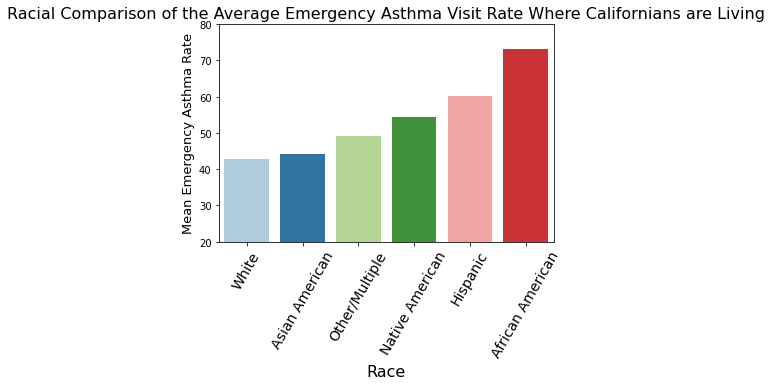

In [147]:
sns.set_palette("Paired")
sns.barplot(data = race_vs_asthma, x = "Race", y = 'Average Emergency Asthma Visits')
plt.title("Racial Comparison of the Average Emergency Asthma Visit Rate Where Californians are Living", fontsize = 16);
plt.ylim(20, 80)
plt.xlabel("Race", fontsize= 16)
plt.ylabel("Mean Emergency Asthma Rate", fontsize = 13)
plt.xticks(np.arange(6), race_vs_asthma["Race"],fontsize=14, rotation= 60);

## Takeaways

From this bar chart, we can see that white people live in areas where there are less emergency visits on average than other racial groups in California. We can also see that African Americans and Hispanic people live in areas with the highest emergency department visits for Asthma. Comparing these findings to the previous bar chart, we can see that those two racial groups also live in areas that have high pollution burden scores on average. 

Does living in a more polluted area heighten risk for severe Asthma? In the next part of my project I will explore whether the two are associated using A/B Testing.

## A/B Testing

In this section, I will conduct A/B testing to see if the distribution of Emergency Asthma visits is different in tracts with high versus low levels of pollution exposure. 

### Defining the Test
<b> Null Hypothesis: </b> There is no difference in the distribution of emergency department asthma visits for people who live in areas with high and low pollution burden scores.

<b> Alternative Hypothesis: </b> The distribution of emergency department asthma visits for people who live in areas with high pollution burden scores is higher than for people living in areas with low pollution burden scores.

<b> Test Statistic: </b> Difference between mean of emergency department asthma visit rates for high pollution areas and mean of emergency department asthma visit rates for low pollution areas.

<b> P-value Cutoff: </b>   5% 

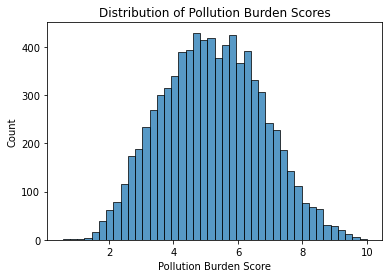

In [102]:
# A bit of EDA to start out
sns.histplot(full_df["Pollution Burden Score"])
plt.title("Distribution of Pollution Burden Scores");

In [103]:
 np.percentile( np.array(full_df["Pollution Burden Score"]), 50)

5.1850000000000005

The pollution burden score is a number in between 0 and 10. The median score in the dataset is 5.185. For my A/B test, I will define high pollution burden scores as scores that are between 6-10 and low pollution burden scores as scores between 0-4. Since we are only looking at low and high pollution scores, I will remove data from tracts with medium pollution levels (a score from 4-6).

In [104]:
## Adding "Pollution level" feature to DataFrame

level_df = pd.DataFrame()
score = full_df["Pollution Burden Score"]
scores = []
level = []

asthma_visits = full_df["Asthma"]
asthma = []

for i in full_df.index:
    if score[i] < 4:
        scores.append(score[i])
        level.append("low")
        asthma.append(asthma_visits[i])
        
    elif score[i] > 6:
        scores.append(score[i])
        level.append("high")
        asthma.append(asthma_visits[i])
    
level_df["Pollution Burden Score"] = scores
level_df["Pollution level"] = level
level_df["Asthma"] = asthma
level_df

,Pollution Burden Score,Pollution level,Asthma
0,9.64,high,129.54
1,8.97,high,105.88
2,9.48,high,76.10
3,8.28,high,139.45
4,8.16,high,139.08
...,...,...,...
4399,1.73,low,22.39
4400,3.65,low,77.03
4401,3.22,low,68.79
4402,6.54,high,48.36


From this data, we will take a sample of 300 rows to perform our hypothesis testing.

In [105]:
#sample of data to use for A/B test
sample_df = level_df.sample(300, replace = False)
sample_df

,Pollution Burden Score,Pollution level,Asthma
3433,3.60,low,23.94
3954,6.31,high,18.17
772,7.04,high,61.64
1580,6.77,high,41.18
2514,3.38,low,83.11
...,...,...,...
3166,3.37,low,45.57
2793,3.35,low,50.95
1818,6.45,high,47.34
4317,1.45,low,25.53


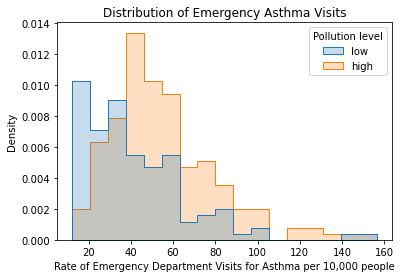

In [106]:
sns.histplot(sample_df, x = "Asthma", stat = 'density',hue = "Pollution level", element = "step")
plt.xlabel("Rate of Emergency Department Visits for Asthma per 10,000 people")
plt.title("Distribution of Emergency Asthma Visits");

We can see a difference in these two distributions, however we can find evidence that the difference may not be due to chance using A/B testing!

I will follow these steps:
1. Calculate observed difference in mean emergency asthma visit rate for the two groups
2. Shuffle the labels and calculate simulated test statistics for 2,000 repetitions
3. Create a histogram and calculate the p-value of the observed test statistic

In [107]:
# Step 1: Calculating observed test statistic
low_mean = np.mean(sample_df[sample_df["Pollution level"] == "low"]["Asthma"])
high_mean = np.mean(sample_df[sample_df["Pollution level"] == "high"]["Asthma"])
obs_stat = high_mean - low_mean
print("We observe that there is a difference of", obs_stat, 
      "between the mean asthma emergency rate of people from high and low pollution level areas.")


We observe that there is a difference of 13.390496700879787 between the mean asthma emergency rate of people from high and low pollution level areas.


In [108]:
def simulate_test_stat(tbl):
    """This function takes in our sample and returns a simulated test statistic"""
    shuffled_labels = np.array(tbl.sample(len(tbl), replace = False)["Pollution level"])
    tbl["Shuffled"] = shuffled_labels
    low_mean = np.mean(tbl[tbl["Shuffled"] == "low"]["Asthma"])
    high_mean = np.mean(tbl[tbl["Shuffled"] == "high"]["Asthma"])
    return high_mean - low_mean

In [109]:
def simulated_stats():
    """Outputs 2000 simulated test statistics"""
    simulated_stats = []
    for i in np.arange(2000):
        simulated_stats.append(simulate_test_stat(sample_df))
    return simulated_stats

In [110]:
sims = simulated_stats()

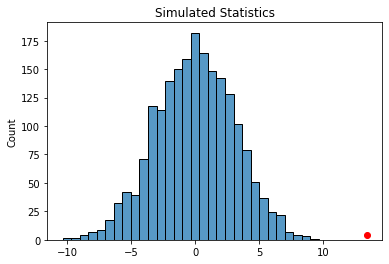

In [111]:
sns.histplot(sims)
plt.plot(obs_stat, 4, "ro")
plt.title("Simulated Statistics");

I plotted the observed test statistic using a red dot.

In [112]:

p_value = np.count_nonzero(np.array(sims) >= obs_stat) / 2000
print("p-value:", p_value)

p-value: 0.0


## Conclusion of the Test

Because our calculated p-value is 0, at a 5% p-value cutoff, we can reject the null hypothesis and conclude that there is evidence in support of the alternative hypothesis. This evidence points to the conclusion that there high pollution levels in an area is associated with more emergency department visits for asthma in the area.